# Importation et description du jeu de données

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import time


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving donnees-defi-egc.csv to donnees-defi-egc (1).csv


In [ ]:
df = pd.read_csv("donnees-defi-egc.csv",na_values="?")

In [ ]:
df.head(10)

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,...,NaN,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,...,NaN,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
5,3,2004,2015.0,2018.0,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.912600e+06,4.222098e+06,1,1,0,0,0
6,6,2004,2013.0,2020.0,ESP5219,ESP1398,Prc La Bruyère accés SUD,30 à 40 cm,excelsior,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.914850e+06,4.222165e+06,0,0,0,0,0
7,2,2004,2014.0,2014.0,ESP2708,ESP1311,Jard Hoche pas Est Malraux,30 à 40 cm,nigra,passages fréquents et arrêts fréquents,...,NaN,Italica,vieillissement dépérissement,1.914403e+06,4.224092e+06,1,0,1,0,0
8,2,2004,2013.0,NaN,ESP18241,ESP18,Sq Mutualité ang Chanrion,40 à 50 cm,acerifolia,passages fréquents et arrêts fréquents,...,NaN,NaN,vigoureux,1.915052e+06,4.224643e+06,0,0,0,0,0
9,5,2004,2015.0,2017.0,ESP30323,ESP995,Prc Echangeurs Bastion St Roch,40 à 50 cm,NaN,passages fréquents ou arrêts,...,NaN,NaN,vigoureux,1.915322e+06,4.224680e+06,1,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ADR_SECTEUR                 15375 non-null  int64  
 1   ANNEEDEPLANTATION           15375 non-null  int64  
 2   ANNEEREALISATIONDIAGNOSTIC  15367 non-null  float64
 3   ANNEETRAVAUXPRECONISESDIAG  10864 non-null  float64
 4   CODE                        15375 non-null  object 
 5   CODE_PARENT                 15375 non-null  object 
 6   CODE_PARENT_DESC            15375 non-null  object 
 7   DIAMETREARBREAUNMETRE       15308 non-null  object 
 8   ESPECE                      14357 non-null  object 
 9   FREQUENTATIONCIBLE          15374 non-null  object 
 10  GENRE_BOTA                  15375 non-null  object 
 11  IDENTIFIANTPLU              361 non-null    float64
 12  INTITULEPROTECTIONPLU       361 non-null    object 
 13  NOTEDIAGNOSTIC              153

In [ ]:
df.shape

(15375, 34)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,IDENTIFIANTPLU,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
count,15375.000000,15375.000000,15367.000000,10864.000000,361.000000,1.537500e+04,1.537500e+04,15375.000000,15375.000000,15375.000000,15375.000000,15375.000000
mean,3.680455,2004.927610,2014.174855,2016.572257,88.022161,1.914222e+06,4.223314e+06,0.325268,0.060423,0.215610,0.046959,0.133984
std,1.678015,2.604701,0.814548,2.063238,63.244144,1.001492e+03,1.319505e+03,0.468490,0.238276,0.411258,0.211559,0.340646
min,1.000000,2004.000000,2011.000000,2012.000000,2.000000,1.911907e+06,4.220467e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2004.000000,2013.000000,2015.000000,70.000000,1.913352e+06,4.222201e+06,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2004.000000,2014.000000,2017.000000,70.000000,1.914340e+06,4.223104e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2004.000000,2015.000000,2018.000000,70.000000,1.915048e+06,4.224558e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,2015.000000,2015.000000,2025.000000,313.000000,1.916252e+06,4.226534e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in df.columns[0::]:
    print(i.upper())
    print('')
    print(df[i].describe(),df[i].unique())
    print('_________________________________________________________________________________________________')


ADR_SECTEUR

count    15375.000000
mean         3.680455
std          1.678015
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: ADR_SECTEUR, dtype: float64 [5 3 2 1 6 4]
_________________________________________________________________________________________________
ANNEEDEPLANTATION

count    15375.000000
mean      2004.927610
std          2.604701
min       2004.000000
25%       2004.000000
50%       2004.000000
75%       2004.000000
max       2015.000000
Name: ANNEEDEPLANTATION, dtype: float64 [2014 2004 2009 2005 2006 2015 2008 2011 2012 2010 2013 2007]
_________________________________________________________________________________________________
ANNEEREALISATIONDIAGNOSTIC

count    15367.000000
mean      2014.174855
std          0.814548
min       2011.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: ANNEEREALISATIONDIAGNOSTIC, dtype: float64 [2014. 2013.   na

In [ ]:
# Pourcentage des données manquantes
df.isnull().sum().sum()/(df.size)*100

20.896030607364896

In [ ]:
# pourcentage de données manquantes par variable
(df.isnull().sum()/df.shape[0])*100

ADR_SECTEUR                    0.000000
ANNEEDEPLANTATION              0.000000
ANNEEREALISATIONDIAGNOSTIC     0.052033
ANNEETRAVAUXPRECONISESDIAG    29.339837
CODE                           0.000000
CODE_PARENT                    0.000000
CODE_PARENT_DESC               0.000000
DIAMETREARBREAUNMETRE          0.435772
ESPECE                         6.621138
FREQUENTATIONCIBLE             0.006504
GENRE_BOTA                     0.000000
IDENTIFIANTPLU                97.652033
INTITULEPROTECTIONPLU         97.652033
NOTEDIAGNOSTIC                 0.260163
PRIORITEDERENOUVELLEMENT       0.826016
RAISONDEPLANTATION            98.504065
REMARQUES                     72.689431
SOUS_CATEGORIE                 0.000000
SOUS_CATEGORIE_DESC            0.000000
STADEDEDEVELOPPEMENT           0.331707
STADEDEVELOPPEMENTDIAG         0.084553
TRAITEMENTCHENILLES           92.923577
TRAVAUXPRECONISESDIAG         29.430894
TROTTOIR                       0.000000
TYPEIMPLANTATIONPLU           97.652033


### Visualisation des données manquantes

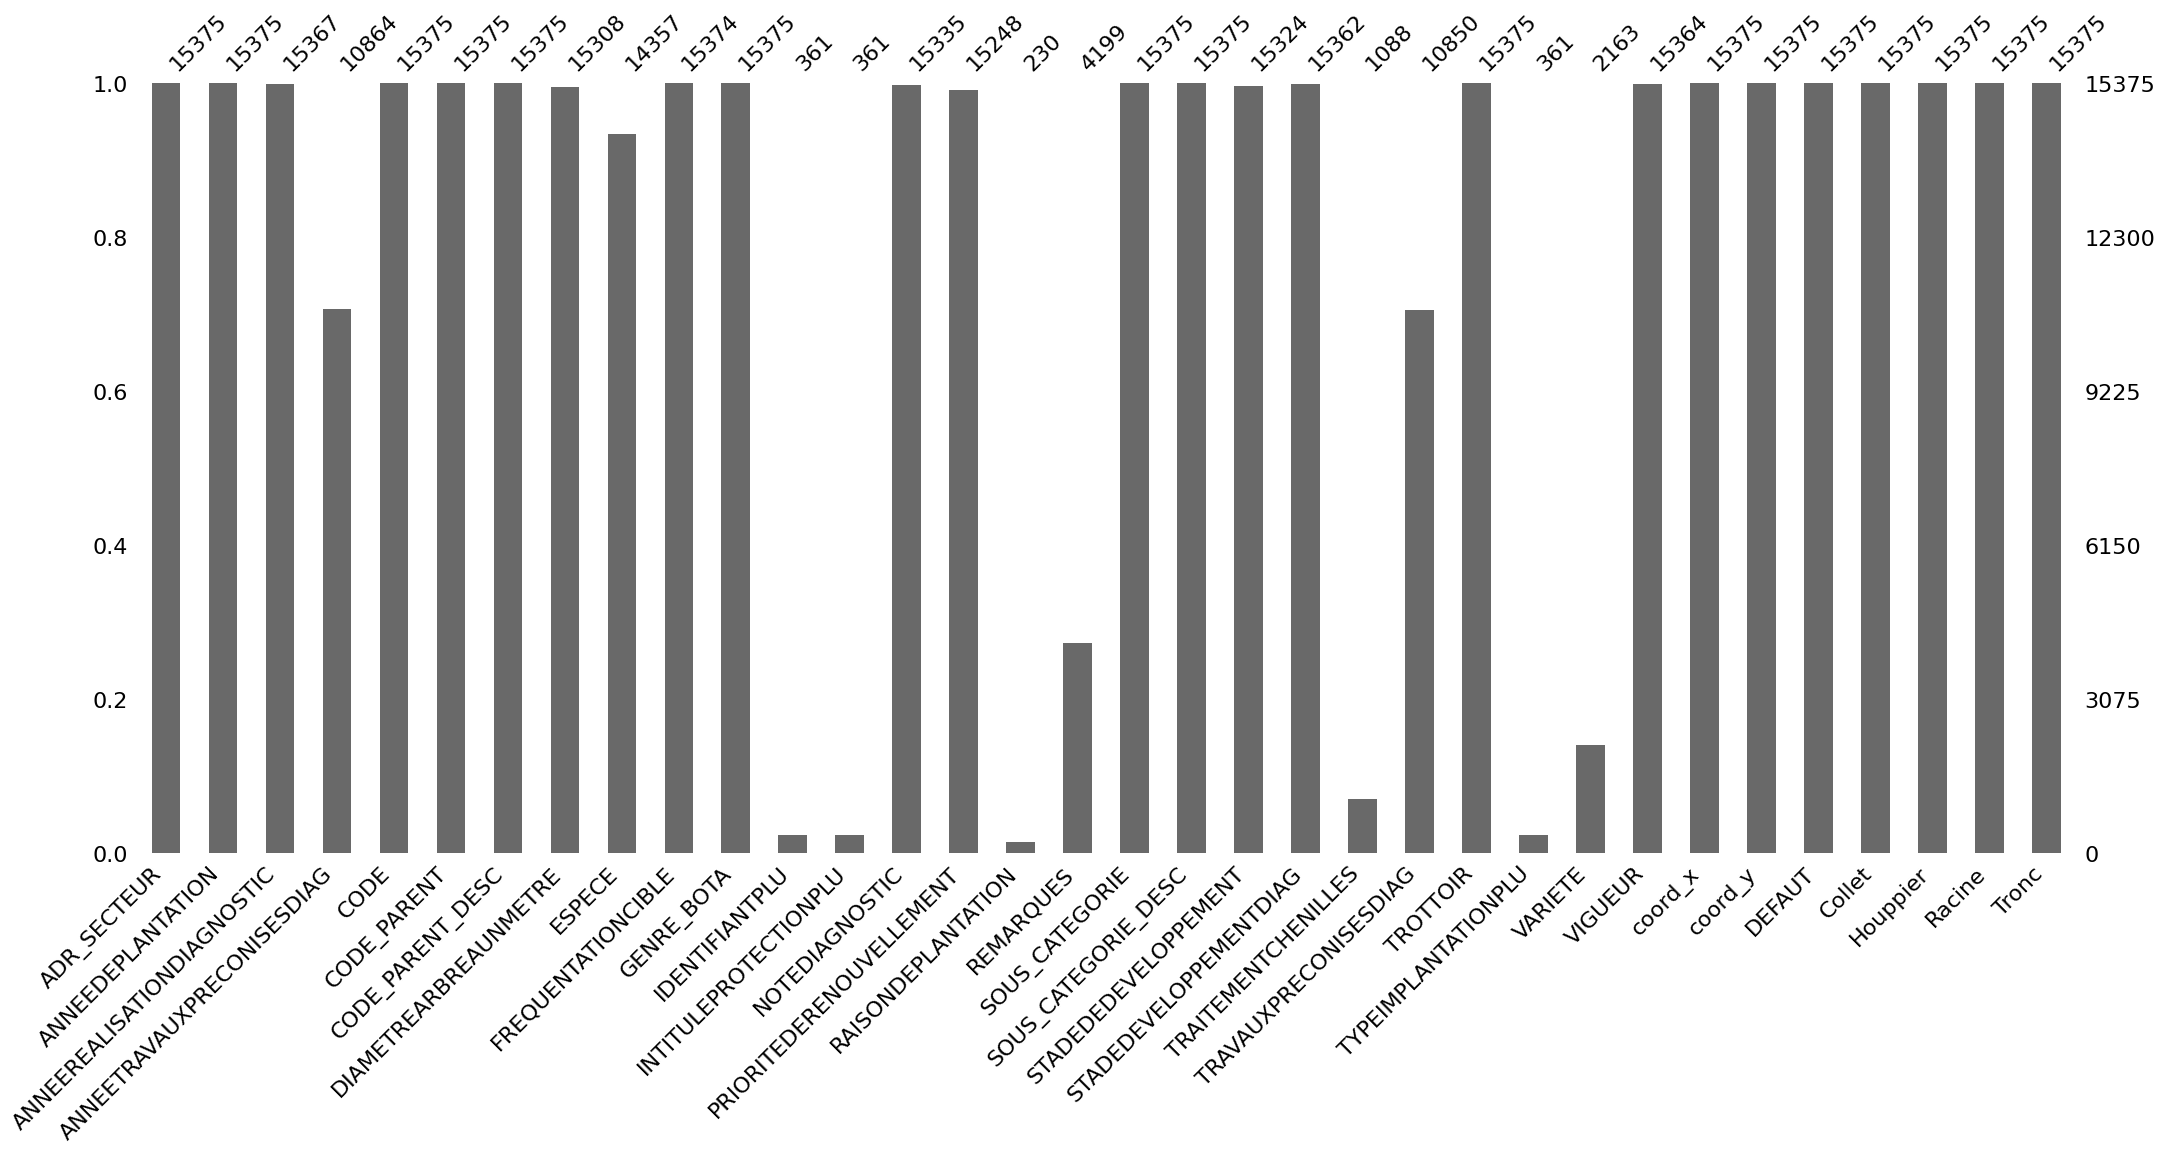

In [ ]:
#Visualisation avec bar
mnso.bar(df)
plt.show()

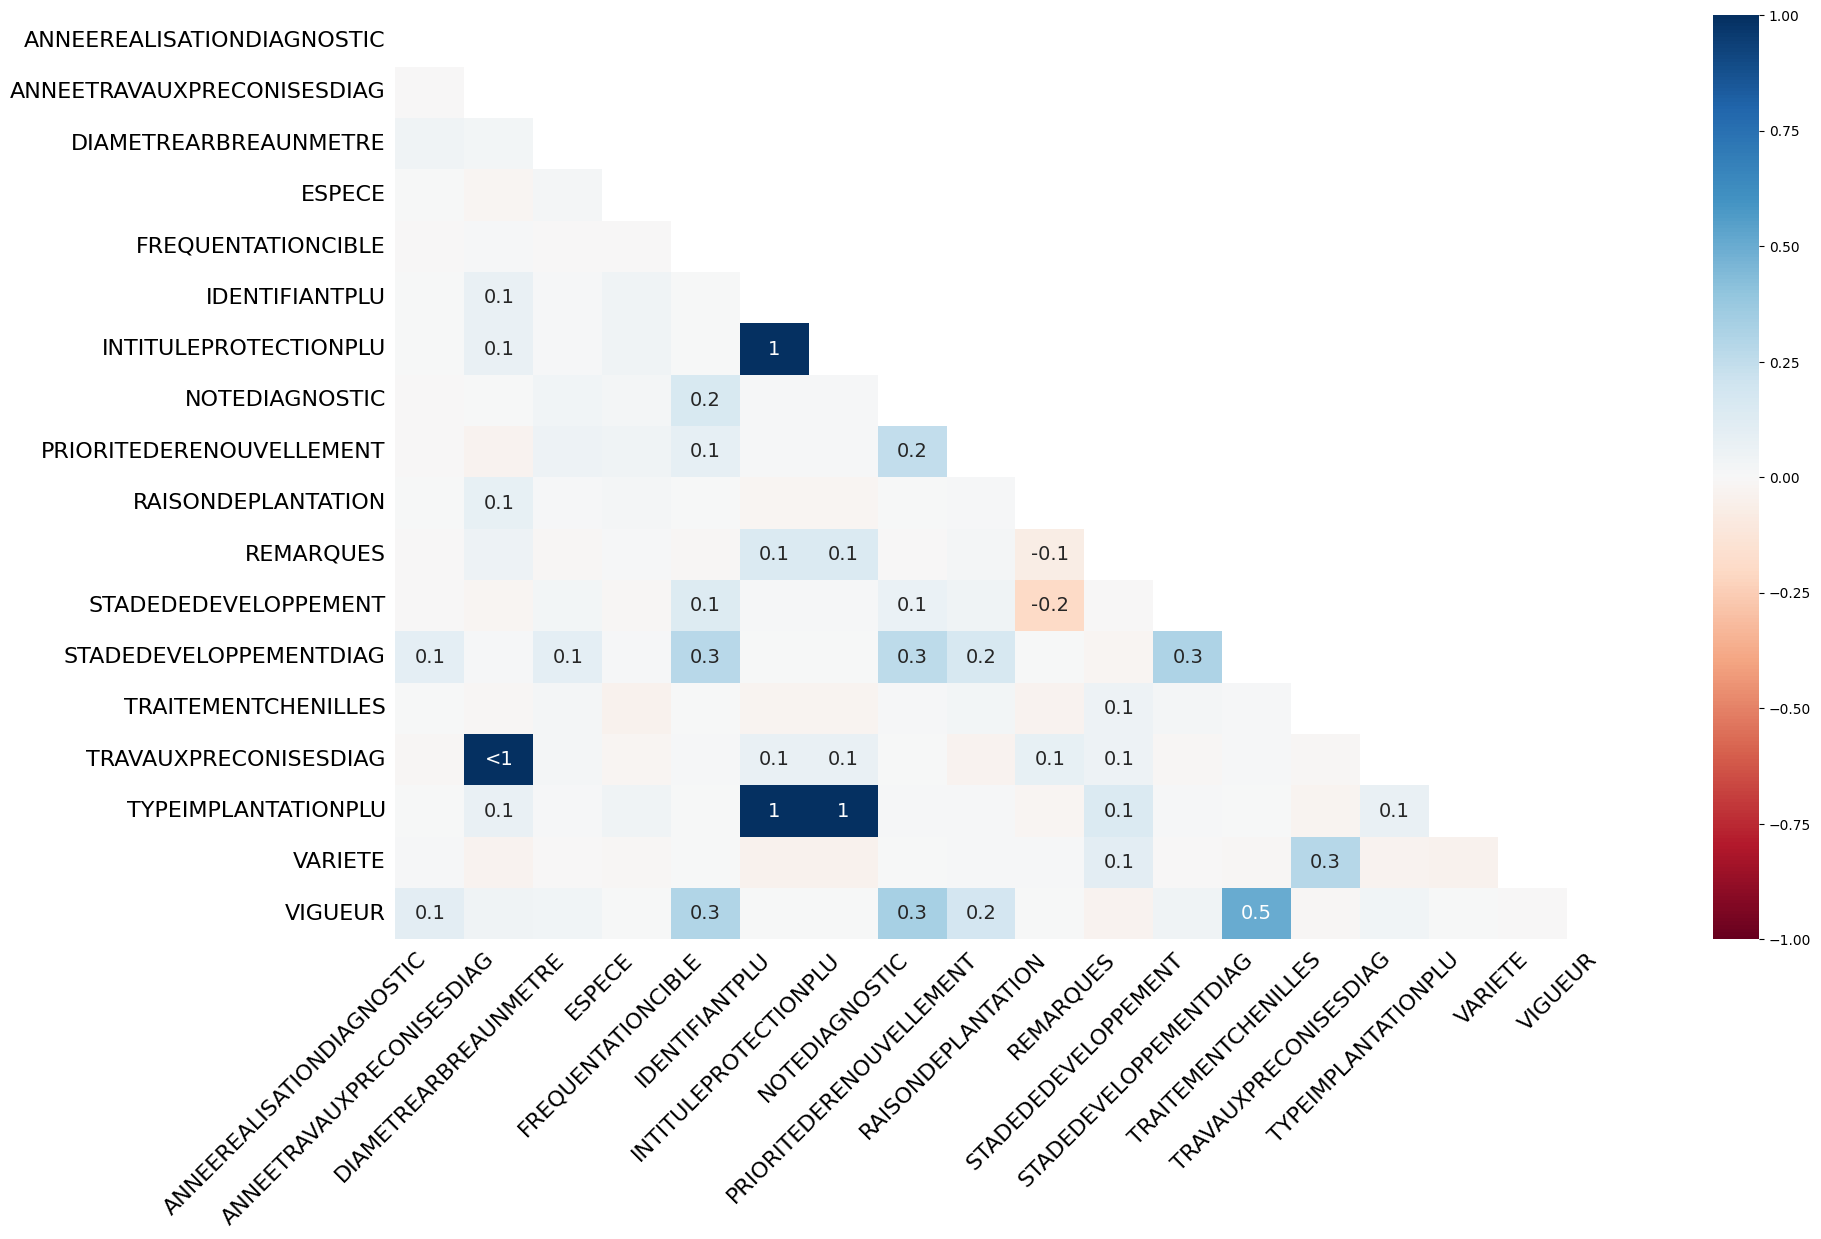

In [ ]:
mnso.heatmap(df)
plt.show()

# Prétraitement des données


In [ ]:
#suppression de variables contenants beaucoup de variables manquantes

col=["VARIETE","TYPEIMPLANTATIONPLU","TRAITEMENTCHENILLES","RAISONDEPLANTATION","INTITULEPROTECTIONPLU","IDENTIFIANTPLU"]
df= df.drop(col,axis=1)



### Etudions la variable REMARQUES

In [ ]:

df.REMARQUES.describe()

count              4199
unique             1684
top       Erreur espèce
freq                138
Name: REMARQUES, dtype: object

In [ ]:
df1=df.copy()
df.REMARQUES

0                                             NaN
1                                             NaN
2                                             NaN
3          Enormément de grosses branches cassées
4                                             NaN
                           ...                   
15370                                         NaN
15371                                         NaN
15372                                         NaN
15373    Réseau aérien passant audessus de larbre
15374                                         NaN
Name: REMARQUES, Length: 15375, dtype: object

In [ ]:
df2=df1.dropna(subset=['REMARQUES'], inplace=False)
df2

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,...,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,...,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
11,4,2004,2014.0,2014.0,ESP1429,ESP666,Av Champon pair,40 à 50 cm,tomentosa,passages fréquents et arrêts fréquents,...,Taille rideau,oui,vigoureux,1.914626e+06,4.223904e+06,1,0,1,0,0
17,4,2004,2015.0,2016.0,ESP30513,ESP1073,Sq L Blum ang Stalingrad,20 à 30 cm,japonica,passages fréquents et arrêts fréquents,...,Abattage,non,vieillissement dépérissement,1.914017e+06,4.222361e+06,1,0,0,0,1
19,4,2004,2013.0,2018.0,ESP23661,ESP1022,R Marquian MIN,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,...,Taille formation et mise au gabarit,oui,vigoureux,1.913629e+06,4.222635e+06,0,0,0,0,0
20,5,2006,2015.0,2018.0,ESP13174,ESP720,Prc Echangeurs Valmy Gallieni,110 à 120 cm,nigra,passages fréquents ou arrêts,...,Taille formation et mise au gabarit,non,vigoureux,1.915539e+06,4.224585e+06,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,5,2004,2014.0,2016.0,ESP2190,ESP146,Cité Moyrand R Dupleix,80 à 90 cm,alba,passages fréquents et arrêts fréquents,...,Emondage,non,vigoureux,1.915646e+06,4.223507e+06,1,0,1,0,0
15359,4,2004,2013.0,NaN,ESP19361,ESP499,Cargo park R P Claudel,0 à 10 cm,cappadocicum,passages fréquents et arrêts fréquents,...,NaN,non,vigoureux,1.914811e+06,4.222721e+06,0,0,0,0,0
15366,5,2004,2015.0,NaN,ESP6304,ESP995,Prc Echangeurs Bastion St Roch,30 à 40 cm,pseudoacacia,passages fréquents ou arrêts,...,NaN,non,vigoureux,1.915249e+06,4.224691e+06,1,0,0,0,1
15368,4,2004,2014.0,NaN,ESP14384,ESP893,R du Mont Aiguille imm rond,30 à 40 cm,platanoides,passages fréquents et arrêts fréquents,...,NaN,oui,vigoureux,1.913814e+06,4.221507e+06,1,0,1,0,0


In [ ]:
df3=df2[["DEFAUT","REMARQUES"]]
df3

,DEFAUT,REMARQUES
3,1,Enormément de grosses branches cassées
11,1,Taillé en rideau
17,1,Inonotus hispidus dans le tronc
19,0,Protection à mettre en place
20,1,Essence ne correspondant pas sur le terrain
...,...,...
15357,1,Arbre fortement réduit sans raison apparente.
15359,0,var.rubra
15366,1,lierre important
15368,1,Erreur essence Une branche abîmée à couper


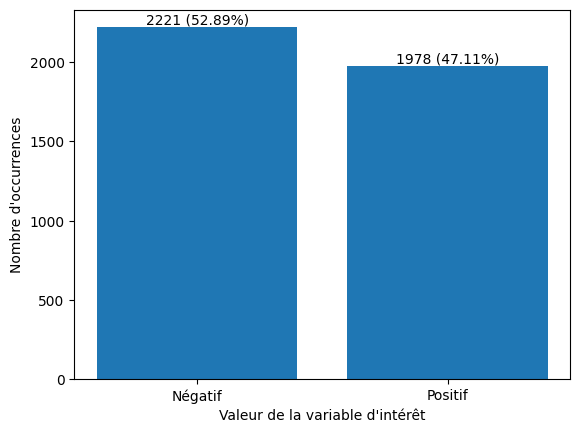

In [ ]:
target_counts = df3['DEFAUT'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (target)
target_proportions = df3['DEFAUT'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Afficher le graphique
plt.show()

In [ ]:
# Sélectionner aléatoirement 10 000 tweets positifs
defaut = df3[df3['DEFAUT'] == 1]
# Sélectionner aléatoirement 1000
pas_defaut = df3[df3['DEFAUT'] == 0]


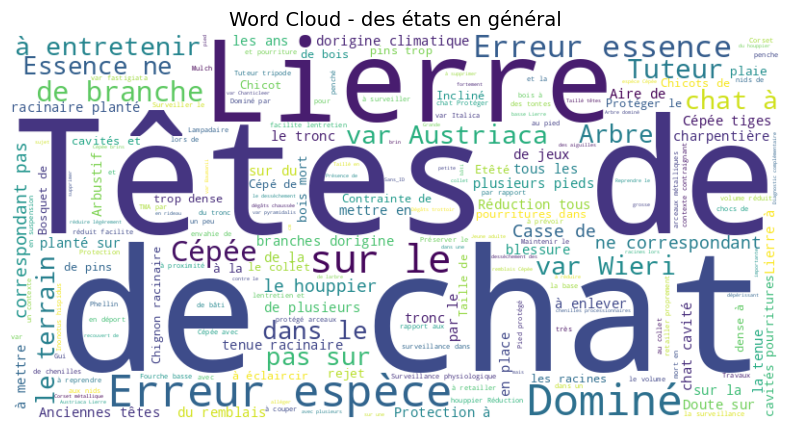

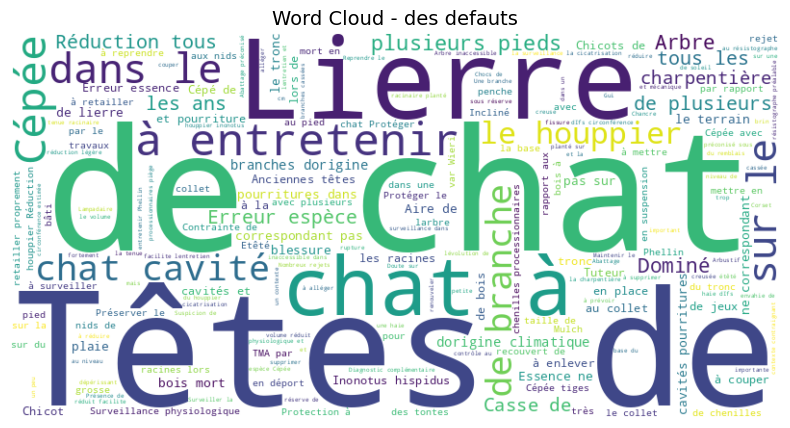

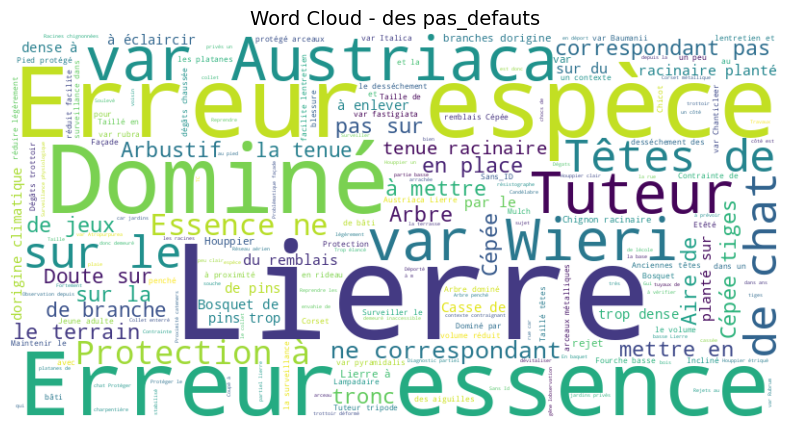

In [ ]:
# Fonction pour générer le word cloud
def generer_wordcloud(defaut, titre):
    tout_texte = ' '.join(defaut)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df3['REMARQUES'], 'Word Cloud - des états en général')
generer_wordcloud(defaut['REMARQUES'], 'Word Cloud - des defauts')
generer_wordcloud(pas_defaut['REMARQUES'], 'Word Cloud - des pas_defauts')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance du vectoriseur TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le vectoriseur sur la colonne 'texte_nettoye'
features = vectorizer.fit_transform(df3['REMARQUES'])

# Convertir les caractéristiques en une représentation de matrice creuse
features = features.toarray()

# Afficher les dimensions de la matrice de caractéristiques
print("Dimensions de la matrice de caractéristiques :", features.shape)

Dimensions de la matrice de caractéristiques : (4199, 1642)


In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df3['DEFAUT'], test_size=0.2, stratify=df3['DEFAUT'], random_state=42)


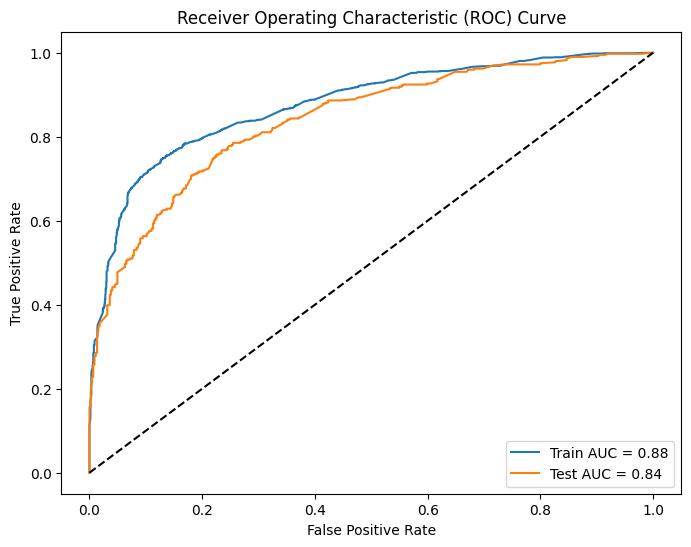

In [ ]:
# Construire le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##  Suite du pretraitement des données
Ici nous allons supprimer la variable REMARQUES

In [ ]:
df=df.drop(["REMARQUES"],axis=1)

In [ ]:

var_quanti = df[["ANNEEREALISATIONDIAGNOSTIC","ANNEETRAVAUXPRECONISESDIAG","coord_x","coord_y","ANNEEDEPLANTATION"]]
var_quali = df.drop(["ANNEEREALISATIONDIAGNOSTIC","ANNEETRAVAUXPRECONISESDIAG","coord_x","coord_y","ANNEEDEPLANTATION"], axis=1)

#### Traitement des valeurs manquantes

In [ ]:
# Remplissage des valeurs
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)



In [ ]:
# verification des valeurs manquantes
df.isnull().sum().sum()/(df.size)*100

0.0

#### Suppression de variables


*   **CODE** est supprimé parce que c'est l'identifiant unique donné à chaque plante recensé
*   **CODE_PARENT_DESC** est supprimée car elle decrit **CODE_PARENT**
*   **SOUS_CATEGORIE_DESC** est supprimée car elle decrit **SOUS_CATEGORIE**
*   **CODE_PARENT** est supprimée car elle est rédonnante avec **ADR_SECTEUR**,**Coord_x**,**Coord_y** et elle contient beaucoup de variables uniques près de 1000




In [ ]:
df=df.drop(["CODE","CODE_PARENT_DESC","SOUS_CATEGORIE_DESC","CODE_PARENT"],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ADR_SECTEUR                 15375 non-null  int64  
 1   ANNEEDEPLANTATION           15375 non-null  int64  
 2   ANNEEREALISATIONDIAGNOSTIC  15375 non-null  float64
 3   ANNEETRAVAUXPRECONISESDIAG  15375 non-null  float64
 4   DIAMETREARBREAUNMETRE       15375 non-null  object 
 5   ESPECE                      15375 non-null  object 
 6   FREQUENTATIONCIBLE          15375 non-null  object 
 7   GENRE_BOTA                  15375 non-null  object 
 8   NOTEDIAGNOSTIC              15375 non-null  object 
 9   PRIORITEDERENOUVELLEMENT    15375 non-null  object 
 10  SOUS_CATEGORIE              15375 non-null  object 
 11  STADEDEDEVELOPPEMENT        15375 non-null  object 
 12  STADEDEVELOPPEMENTDIAG      15375 non-null  object 
 13  TRAVAUXPRECONISESDIAG       153

DEFAUT



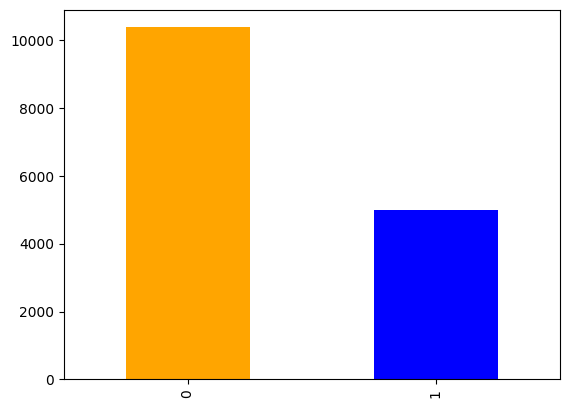

_______________________________________________________________________________
COLLET



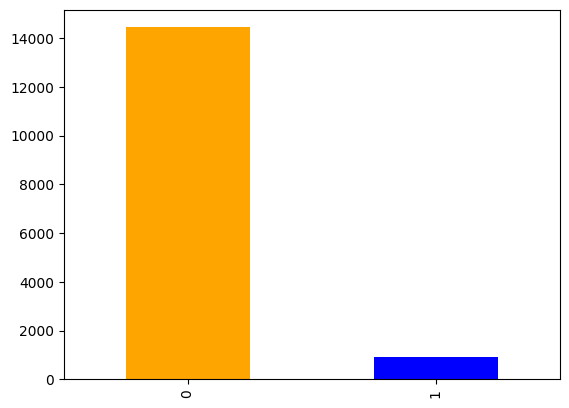

_______________________________________________________________________________
RACINE



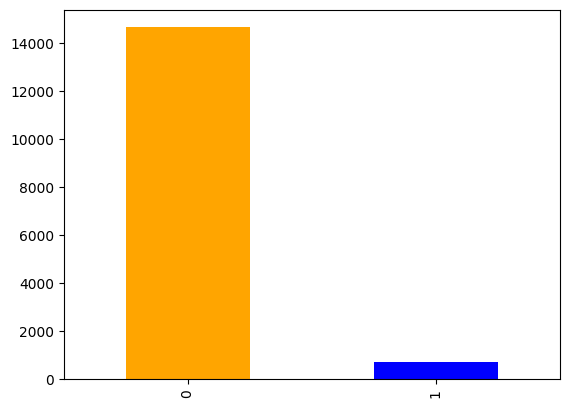

_______________________________________________________________________________
TRONC



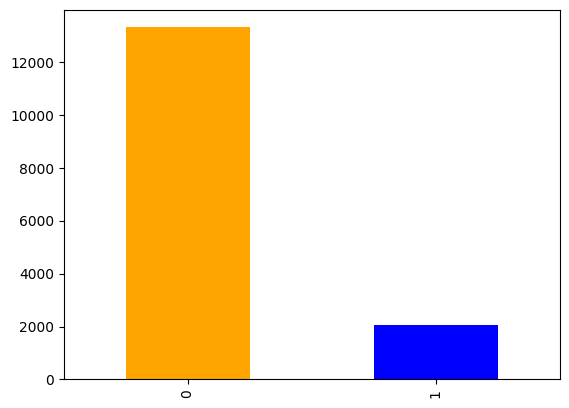

_______________________________________________________________________________
HOUPPIER



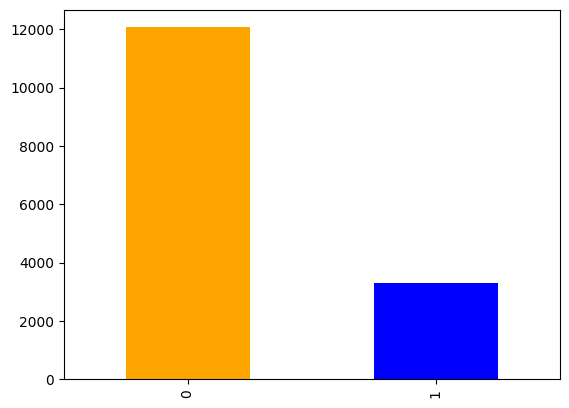

_______________________________________________________________________________


In [ ]:

for i in ["DEFAUT","Collet","Racine","Tronc","Houppier"]:
    print(i.upper())

    print('')

    df[i].value_counts().plot(kind='bar',color = ["orange","blue"])

    plt.show()





    print('_______________________________________________________________________________')




#### Transformation des variables

In [ ]:
encoder = OneHotEncoder() # modalité en variables binaire
labelencoder = LabelEncoder() # catégorielle en numerique


In [ ]:
encoded = encoder.fit_transform(df[['TRAVAUXPRECONISESDIAG']])

# Conversion en dataframe Pandas
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['TRAVAUXPRECONISESDIAG']))

# Résultat
encoded_df
df = df.drop("TRAVAUXPRECONISESDIAG", axis = 1)
df = pd.concat([df,encoded_df],axis=1)

In [ ]:
encoded1 = encoder.fit_transform(df[['GENRE_BOTA']])

# Conversion en dataframe Pandas
encoded_df1 = pd.DataFrame(encoded1.toarray(), columns=encoder.get_feature_names_out(['GENRE_BOTA']))

# Résultat
encoded_df1
df = df.drop("GENRE_BOTA", axis = 1)
df = pd.concat([df,encoded_df1],axis=1)

In [ ]:
encoded2 = encoder.fit_transform(df[['ESPECE']])

# Conversion en dataframe Pandas
encoded_df2 = pd.DataFrame(encoded2.toarray(), columns=encoder.get_feature_names_out(['ESPECE']))

# Résultat
encoded_df2
df = df.drop("ESPECE", axis = 1)
df = pd.concat([df,encoded_df2],axis=1)

In [ ]:
encoded3 = encoder.fit_transform(df[['DIAMETREARBREAUNMETRE']])

# Conversion en dataframe Pandas
encoded_df3 = pd.DataFrame(encoded3.toarray(), columns=encoder.get_feature_names_out(['DIAMETREARBREAUNMETRE']))

# Résultat
encoded_df3
df = df.drop("DIAMETREARBREAUNMETRE", axis = 1)
df = pd.concat([df,encoded_df3],axis=1)

In [ ]:
### Tranformation de VIGUEUR

df["VIGUEUR"] = df["VIGUEUR"].replace('vigoureux',3).replace('vigueur intermédiaire',2).replace('vieillissement dépérissement',1)


In [ ]:
# Transformation de TRottoir

df["TROTTOIR"] = df["TROTTOIR"].replace('non',0).replace('oui',1)



In [ ]:
# TRansformation de STADEDEVELOPPEMENTDIAG

df["STADEDEVELOPPEMENTDIAG"] = df["STADEDEVELOPPEMENTDIAG"].replace('Arbre jeune',1).replace('Arbre adulte',2).replace('Arbre vieillissant',3)


In [ ]:
# TRansformation de STADEDEVELOPPEMENT

df["STADEDEDEVELOPPEMENT"] = df["STADEDEDEVELOPPEMENT"].replace('Arbre jeune',1).replace('Arbre adulte',2).replace('Arbre vieillissant',3)


In [ ]:
# Transformation de SOUS_CATEGORIE
df["SOUS_CATEGORIE"] = df["SOUS_CATEGORIE"].replace('ESP151',1).replace('ESP174',2).replace('ESP065',3).replace('ESP187',4)


In [ ]:
# Transformation de PRIORITEDERENOUVELLEMENT
df["PRIORITEDERENOUVELLEMENT"] = df["PRIORITEDERENOUVELLEMENT"].replace('de 1 à 5 ans',1).replace('de 6 à 10 ans',2).replace('de 11 à 20 ans',3).replace('plus de 20 ans',4)


In [ ]:
# transformation de NOTEDIAGNOSTIC
df["NOTEDIAGNOSTIC"] = df["NOTEDIAGNOSTIC"].replace('Arbre davenir normal',1).replace('Arbre à abattre dans les 5 ans',2).replace('Arbre à abattre dans les 10 ans',3).replace('Arbre davenir incertain',4).replace('Arbre à abattre immédiatement',5)



In [ ]:
# Transformation de FREQUENTATIONCIBLE
df["FREQUENTATIONCIBLE"] = df["FREQUENTATIONCIBLE"].replace('passages fréquents ou arrêts',1).replace('passages fréquents et arrêts fréquents',2).replace('quelques passages',3)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Columns: 386 entries, ADR_SECTEUR to DIAMETREARBREAUNMETRE_90 à 100 cm
dtypes: float64(371), int64(15)
memory usage: 45.3 MB


# MODELISATION DE DEFAUT

In [ ]:
X = df.drop(["DEFAUT","Tronc","Houppier","Racine","Collet"], axis=1)
y=df["DEFAUT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
# df.to_csv('data_test.csv', index=True)
# files.download('data_test.csv')

In [ ]:
from sklearn import  metrics
# Let's prepare list of models for test


classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),


]

oversamples=[None,SMOTE()]
labels= ["LR",
    "RandomForest",
     "GradientBoosting",
    "XGB",
    "DecisionTree",

        ]


# Let's test the models

score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
cv_scores = []

time_ = []
time_cross=[]
i=0
for classifier in classifiers:
    i=i+1
    for over in oversamples:

        clf = Pipeline(steps=[('over',over),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')
        time_.append(f'{round(end_time-start_time,2)}s')


        # Utiliser StratifiedKFold pour la classification (garantit une distribution équilibrée des classes dans chaque fold)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Effectuer la cross-validation
        start_time = time.time()
        cv_scores.append(np.mean(cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')))
        end_time = time.time()
        time_cross.append(f'{round(end_time-start_time,2)}s')




d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     'time':time_
    }
t={"crossvalidation_stratifié": cv_scores,
   "temp_cross": time_cross
}
tab_cross = pd.DataFrame(data=t)
tab_cross.insert(loc=0,column="methode",value=names)
tab_cross
data = pd.DataFrame(data=d)
data.insert(loc=0, column='Method', value=names                                       )
data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.000000,0.000000,0.000000,0.673315,None,0.34s
1,LR,0.326685,1.000000,0.492484,0.326685,SMOTE(),0.77s
2,RandomForest,0.812139,0.745853,0.777586,0.860611,None,4.08s
3,RandomForest,0.803771,0.763769,0.783260,0.861912,SMOTE(),5.01s
4,GradientBoosting,0.854149,0.676178,0.754815,0.856493,None,6.49s
5,GradientBoosting,0.829305,0.728600,0.775698,0.862346,SMOTE(),10.96s
6,XGB,0.849811,0.747180,0.795198,0.874268,None,1.25s
7,XGB,0.837363,0.758461,0.795961,0.872968,SMOTE(),3.16s
8,DecisionTree,0.762129,0.750498,0.756269,0.841968,None,0.32s
9,DecisionTree,0.753298,0.757797,0.755541,0.839801,SMOTE(),1.3s


# Modélisation de Tronc

In [ ]:
y=df["Tronc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
from sklearn import  metrics
# Let's prepare list of models for test


classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),


]

oversamples=[None,SMOTE()]
labels= ["LR",
    "RandomForest",
     "GradientBoosting",
    "XGB",
    "DecisionTree",

        ]


# Let's test the models

score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
cv_scores = []

time_ = []
time_cross=[]
i=0
for classifier in classifiers:
    i=i+1
    for over in oversamples:

        clf = Pipeline(steps=[('over',over),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')
        time_.append(f'{round(end_time-start_time,2)}s')


        # Utiliser StratifiedKFold pour la classification (garantit une distribution équilibrée des classes dans chaque fold)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Effectuer la cross-validation
        start_time = time.time()
        cv_scores.append(np.mean(cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')))
        end_time = time.time()
        time_cross.append(f'{round(end_time-start_time,2)}s')




d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     'time':time_
    }
t={"crossvalidation_stratifié": cv_scores,
   "temp_cross": time_cross
}
tab_cross = pd.DataFrame(data=t)
tab_cross.insert(loc=0,column="methode",value=names)
tab_cross

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,methode,crossvalidation_stratifié,temp_cross
0,LR,0.866016,2.99s
1,LR,0.866016,2.98s
2,RandomForest,0.890798,51.27s
3,RandomForest,0.891318,50.06s
4,GradientBoosting,0.887545,93.87s
5,GradientBoosting,0.887610,99.15s
6,XGB,0.899253,19.09s
7,XGB,0.899253,21.06s
8,DecisionTree,0.864977,5.09s
9,DecisionTree,0.865106,6.07s


In [ ]:
data = pd.DataFrame(data=d)
data.insert(loc=0, column='Method', value=names                                       )
data

,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.000000,0.000000,0.000000,0.864947,None,0.17s
1,LR,0.000000,0.000000,0.000000,0.864947,SMOTE(),0.53s
2,RandomForest,0.627685,0.422151,0.504798,0.888142,None,4.27s
3,RandomForest,0.598790,0.476726,0.530831,0.886191,SMOTE(),5.91s
4,GradientBoosting,0.652597,0.322632,0.431794,0.885324,None,6.42s
5,GradientBoosting,0.497878,0.565008,0.529323,0.864297,SMOTE(),15.52s
6,XGB,0.663594,0.462279,0.544939,0.895729,None,2.89s
7,XGB,0.609756,0.521669,0.562284,0.890310,SMOTE(),3.78s
8,DecisionTree,0.482540,0.487961,0.485235,0.860178,None,0.36s
9,DecisionTree,0.465517,0.520064,0.491281,0.854542,SMOTE(),1.53s


#Modelisation de houppier

In [ ]:
y=df["Houppier"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
from sklearn import  metrics
# Let's prepare list of models for test


classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),


]

oversamples=[None,SMOTE()]
labels= ["LR",
    "RandomForest",
     "GradientBoosting",
    "XGB",
    "DecisionTree",

        ]


# Let's test the models

score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
cv_scores = []

time_ = []
time_cross=[]
i=0
for classifier in classifiers:
    i=i+1
    for over in oversamples:

        clf = Pipeline(steps=[('over',over),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')
        time_.append(f'{round(end_time-start_time,2)}s')


        # Utiliser StratifiedKFold pour la classification (garantit une distribution équilibrée des classes dans chaque fold)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Effectuer la cross-validation
        start_time = time.time()
        cv_scores.append(np.mean(cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')))
        end_time = time.time()
        time_cross.append(f'{round(end_time-start_time,2)}s')




d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     'time':time_
    }
t={"crossvalidation_stratifié": cv_scores,
   "temp_cross": time_cross
}
tab_cross = pd.DataFrame(data=t)
tab_cross.insert(loc=0,column="methode",value=names)
tab_cross


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,methode,crossvalidation_stratifié,temp_cross
0,LR,0.784390,2.9s
1,LR,0.784390,3.94s
2,RandomForest,0.890276,50.13s
3,RandomForest,0.890667,51.02s
4,GradientBoosting,0.876033,97.73s
5,GradientBoosting,0.875968,94.45s
6,XGB,0.897952,19.53s
7,XGB,0.897952,20.01s
8,DecisionTree,0.865366,4.92s
9,DecisionTree,0.864716,5.91s


In [ ]:
data = pd.DataFrame(data=d)
data.insert(loc=0, column='Method', value=names)
data

,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.000000,0.000000,0.000000,0.786907,None,0.17s
1,LR,0.213093,1.000000,0.351322,0.213093,SMOTE(),0.58s
2,RandomForest,0.766249,0.683622,0.722581,0.888142,None,4.57s
3,RandomForest,0.743169,0.691760,0.716544,0.883373,SMOTE(),6.45s
4,GradientBoosting,0.738318,0.642930,0.687330,0.875352,None,6.72s
5,GradientBoosting,0.674610,0.748728,0.709740,0.869499,SMOTE(),12.68s
6,XGB,0.779755,0.713123,0.744952,0.895946,None,1.27s
7,XGB,0.751050,0.727365,0.739018,0.890527,SMOTE(),3.13s
8,DecisionTree,0.696058,0.682604,0.689266,0.868849,None,0.33s
9,DecisionTree,0.664062,0.691760,0.677628,0.859744,SMOTE(),1.02s


# Modelisation de Racine

In [ ]:
y=df["Racine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
from sklearn import  metrics
# Let's prepare list of models for test


classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),


]

oversamples=[None,SMOTE()]
labels= ["LR",
    "RandomForest",
     "GradientBoosting",
    "XGB",
    "DecisionTree",

        ]


# Let's test the models

score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
cv_scores = []

time_ = []
time_cross=[]
i=0
for classifier in classifiers:
    i=i+1
    for over in oversamples:

        clf = Pipeline(steps=[('over',over),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')
        time_.append(f'{round(end_time-start_time,2)}s')


        # Utiliser StratifiedKFold pour la classification (garantit une distribution équilibrée des classes dans chaque fold)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Effectuer la cross-validation
        start_time = time.time()
        cv_scores.append(np.mean(cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')))
        end_time = time.time()
        time_cross.append(f'{round(end_time-start_time,2)}s')




d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     'time':time_
    }
t={"crossvalidation_stratifié": cv_scores,
   "temp_cross": time_cross
}
tab_cross = pd.DataFrame(data=t)
tab_cross.insert(loc=0,column="methode",value=names)
tab_cross

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,methode,crossvalidation_stratifié,temp_cross
0,LR,0.953041,3.32s
1,LR,0.953041,3.28s
2,RandomForest,0.954602,37.45s
3,RandomForest,0.954341,38.81s
4,GradientBoosting,0.953821,91.18s
5,GradientBoosting,0.953821,92.0s
6,XGB,0.957073,18.94s
7,XGB,0.957073,18.76s
8,DecisionTree,0.940163,6.25s
9,DecisionTree,0.940553,5.19s


In [ ]:
data = pd.DataFrame(data=d)
data.insert(loc=0, column='Method', value=names                                       )
data

,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.000000,0.000000,0.000000,0.949707,None,0.7s
1,LR,0.050293,1.000000,0.095769,0.050293,SMOTE(),0.51s
2,RandomForest,0.519231,0.232759,0.321429,0.950574,None,2.59s
3,RandomForest,0.468966,0.293103,0.360743,0.947756,SMOTE(),6.27s
4,GradientBoosting,0.724138,0.090517,0.160920,0.952525,None,6.2s
5,GradientBoosting,0.269841,0.366379,0.310786,0.918274,SMOTE(),15.48s
6,XGB,0.586538,0.262931,0.363095,0.953609,None,1.28s
7,XGB,0.445122,0.314655,0.368687,0.945805,SMOTE(),5.2s
8,DecisionTree,0.343874,0.375000,0.358763,0.932582,None,0.36s
9,DecisionTree,0.312741,0.349138,0.329939,0.928680,SMOTE(),1.04s


# Modélisation de Collet

In [ ]:
y=df["Collet"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
from sklearn import  metrics
# Let's prepare list of models for test


classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier(),


]

oversamples=[None,SMOTE()]
labels= ["LR",
    "RandomForest",
     "GradientBoosting",
    "XGB",
    "DecisionTree",

        ]


# Let's test the models

score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
cv_scores = []

time_ = []
time_cross=[]
i=0
for classifier in classifiers:
    i=i+1
    for over in oversamples:

        clf = Pipeline(steps=[('over',over),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()

        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')
        time_.append(f'{round(end_time-start_time,2)}s')


        # Utiliser StratifiedKFold pour la classification (garantit une distribution équilibrée des classes dans chaque fold)
        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        # Effectuer la cross-validation
        start_time = time.time()
        cv_scores.append(np.mean(cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')))
        end_time = time.time()
        time_cross.append(f'{round(end_time-start_time,2)}s')




d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     'time':time_
    }
t={"crossvalidation_stratifié": cv_scores,
   "temp_cross": time_cross
}
tab_cross = pd.DataFrame(data=t)
tab_cross.insert(loc=0,column="methode",value=names)
tab_cross


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,methode,crossvalidation_stratifié,temp_cross
0,LR,0.939577,3.99s
1,LR,0.939577,4.5s
2,RandomForest,0.945170,40.94s
3,RandomForest,0.945496,40.67s
4,GradientBoosting,0.945691,90.86s
5,GradientBoosting,0.945822,92.98s
6,XGB,0.947968,18.49s
7,XGB,0.947968,18.15s
8,DecisionTree,0.927090,6.55s
9,DecisionTree,0.925464,5.2s


In [ ]:
data = pd.DataFrame(data=d)
data.insert(loc=0, column='Method', value=names                                       )
data

,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.000000,0.000000,0.000000,0.937351,None,0.22s
1,LR,0.077251,0.564014,0.135890,0.550618,SMOTE(),1.08s
2,RandomForest,0.608333,0.252595,0.356968,0.942987,None,3.59s
3,RandomForest,0.537037,0.301038,0.385809,0.939952,SMOTE(),6.4s
4,GradientBoosting,0.608696,0.145329,0.234637,0.940603,None,6.43s
5,GradientBoosting,0.387234,0.314879,0.347328,0.925862,SMOTE(),15.39s
6,XGB,0.597015,0.276817,0.378251,0.942987,None,1.27s
7,XGB,0.508197,0.321799,0.394068,0.938001,SMOTE(),5.18s
8,DecisionTree,0.376712,0.380623,0.378657,0.921743,None,0.41s
9,DecisionTree,0.332298,0.370242,0.350245,0.913939,SMOTE(),1.29s
